#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


##1) Delivery_time -> Predict delivery time using sorting time

In [109]:
#To avoid  any warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Importing data set
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [111]:
import pandas as pd
dataset1 = pd.read_csv("delivery_time.csv")
dataset1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

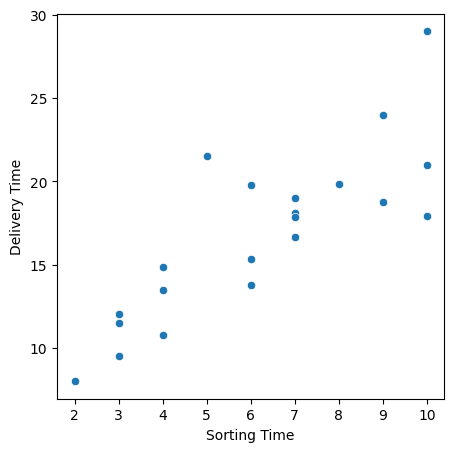

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(5,5))
sns.scatterplot(x ='Sorting Time',y = 'Delivery Time' , data = dataset1 , palette ='Set1')

From above scatter plot, increase in sorting time leads to increase delivery time

EDA


In [113]:
dataset1=dataset1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [114]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [115]:
dataset1.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [116]:
#Correlation

#-1 ------ -0.5 ------- 0 ------- +5 ------- +1

In [117]:
dataset1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


Correlation coefficient value r = 0.825997 indicates that there is a strong correlation between independent variable and dependent variable

In [118]:
import seaborn as sns


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

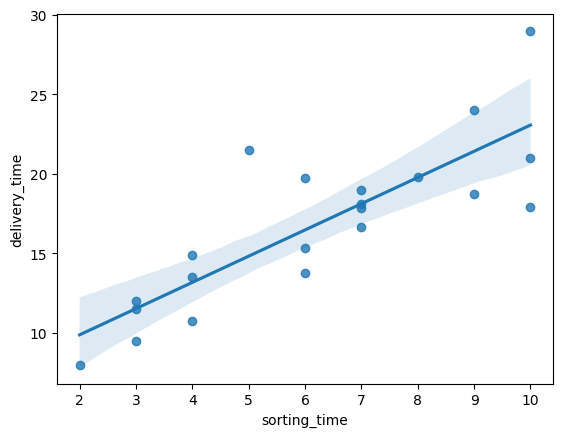

In [119]:
sns.regplot(x=dataset1['sorting_time'],y=dataset1['delivery_time'])

<Axes: xlabel='sorting_time', ylabel='Density'>

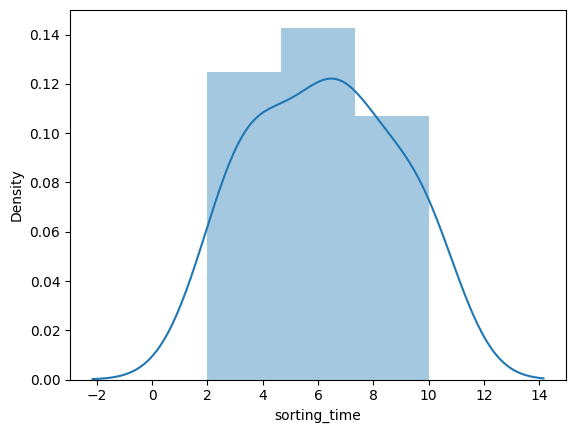

In [120]:
import seaborn as sns
sns.distplot(dataset1['sorting_time'])

<Axes: xlabel='delivery_time', ylabel='Density'>

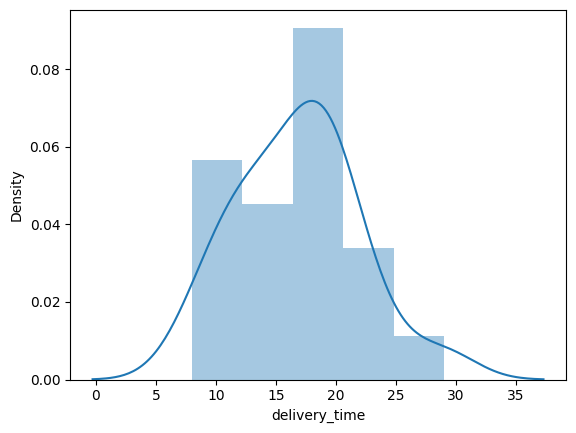

In [121]:
import seaborn as sns
sns.distplot(dataset1['delivery_time'])

In [122]:
#from the above dist plots we can say that there are no outliers

##Model Fitting

In [123]:
import statsmodels.formula.api as snf

In [124]:
model = snf.ols("delivery_time~sorting_time",data=dataset1).fit()
#Dependent Variable = Delivery Time and Independent variable is Sorting Time

##Model Testing

In [125]:
#Coefficients Parameters
model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [126]:
##beta value is 1.649020 and c = 6.582734  in y=B0+B1+x+e(y=c+mx)

In [127]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

Checking predictions of Model by equation

From the result Bo = 6.582734 and B1 = 1.649020, so our linear regression equation will become Y = Bo + B1X

Y = 6.582734 + 1.649020*X

y =B0 + B1 * X1 +e

B0 = Intercept

B1 = slope

X1 = independent data point

e(error) = Vertical distance between the actual 'delivery_time' value & the delivery_time fitted value

In [128]:
#manual calculation
##Y = 6.582734 + 1.649020*10
#Y

In [129]:
#To see the model predictions
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [130]:
dataset1['delivery_time_Predicted'] = model.fittedvalues
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


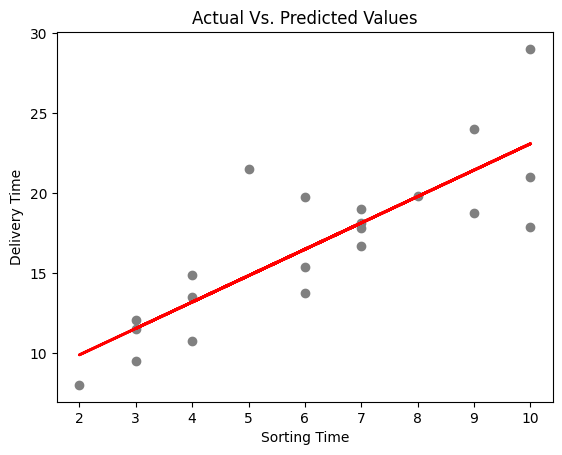

In [131]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset1.sorting_time, dataset1.delivery_time,  color='gray')
plt.plot(dataset1.sorting_time, dataset1.delivery_time_Predicted, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [132]:
#for mannual calculations
#datset1['Predicted1'] = 6.582734  + (1.649020 * dataset1['sorting_time']	)
#dataset1[0:5]

In [133]:
#To generate the residual values
#Difference between Actual & Fitted values
dataset1['Error'] = model.resid   #redid = residuals
dataset1[0:5]


,delivery_time,sorting_time,delivery_time_Predicted,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


In [134]:
#dataset1['Error1'] = dataset1['delivery_time'] - dataset1['delivery_time_Predicted']
#dataset1[0:5]

In [135]:
#Y = B0 +B1*X + e
#c = 6.582734
#m = 1.649020

dataset1['Y'] = 6.582734 + (1.649020 + dataset1['delivery_time'] + dataset1['Error'])
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y
0,21.00,10,23.072933,-2.072933,27.158821
1,13.50,4,13.178814,0.321186,22.052940
2,19.75,6,16.476853,3.273147,31.254901
3,24.00,9,21.423913,2.576087,34.807841
4,29.00,10,23.072933,5.927067,43.158821


In [136]:
dataset1['Error_Sq'] = (dataset1['Error'])**2
dataset1[0:5]

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y,Error_Sq
0,21.00,10,23.072933,-2.072933,27.158821,4.297051
1,13.50,4,13.178814,0.321186,22.052940,0.103161
2,19.75,6,16.476853,3.273147,31.254901,10.713489
3,24.00,9,21.423913,2.576087,34.807841,6.636224
4,29.00,10,23.072933,5.927067,43.158821,35.130124


In [137]:
Mean_Squared_Error = dataset1['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [138]:
model.rsquared

0.6822714748417231

In [139]:
#68.2% of variation in the dependent variable is explained by the given independent varaible

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        09:53:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(dataset1.delivery_time, dataset1.delivery_time_Predicted))
print('Mean Squared Error:', metrics.mean_squared_error(dataset1.delivery_time, dataset1.delivery_time_Predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dataset1.delivery_time, dataset1.delivery_time_Predicted)))
print("R^2 Score :          ", metrics.r2_score(dataset1.delivery_time, dataset1.delivery_time_Predicted))

Mean Absolute Error: 2.085740955188266
Mean Squared Error: 7.793311548584062
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


Transformations


# LOG Transformation

Building model with Logarithmic Transformation

Y = a + b * log(x)

In [142]:
# Preparing data for model building
data1 = pd.DataFrame.copy(dataset1)
data1['log_sorting_time'] = np.log(data1.sorting_time)
data1.head()

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y,Error_Sq,log_sorting_time
0,21.00,10,23.072933,-2.072933,27.158821,4.297051,2.302585
1,13.50,4,13.178814,0.321186,22.052940,0.103161,1.386294
2,19.75,6,16.476853,3.273147,31.254901,10.713489,1.791759
3,24.00,9,21.423913,2.576087,34.807841,6.636224,2.197225
4,29.00,10,23.072933,5.927067,43.158821,35.130124,2.302585


In [143]:
import statsmodels.formula.api as snf
log_model = snf.ols('delivery_time ~ log_sorting_time', data = data1).fit()

In [144]:
#parameters from Model

#Coefficients Parameters
print(log_model.params)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept           1.159684
log_sorting_time    9.043413
dtype: float64
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


Checking predictions of Model by equation

From the result Bo = 1.1596835115465813 and B1 = 9.043413458205762,

 so linear regression equation will become Y = Bo + B1*log(X)

Y = 1.1596835115465813 + 9.043413458205762*log(X)

In [145]:
l_predicted_time = log_model.predict(data1.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.delivery_time, 'Log_Delivery_Time_Predicted' : l_predicted_time})
pred_df

,Delivery_Time_Actual,Log_Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


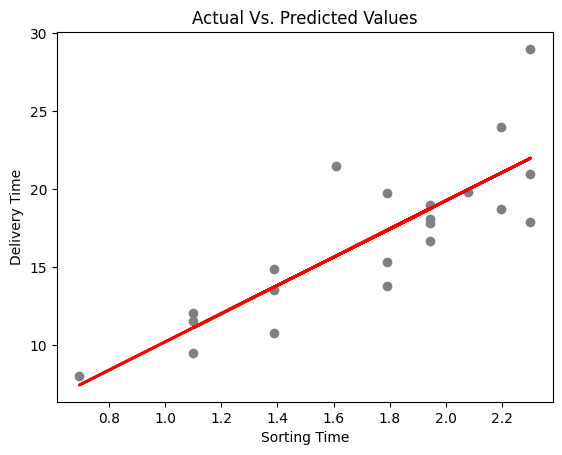

In [146]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.log_sorting_time, data1.delivery_time,  color='gray')
plt.plot(data1.log_sorting_time, l_predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.delivery_time, l_predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.delivery_time, l_predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.delivery_time, l_predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.delivery_time, l_predicted_time))

Mean Absolute Error: 2.047375706792902
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score :           0.6954434611324223


In [148]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        09:53:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Square Root Transformation


Building model with square root transformation¶
√Y = a + b * X + e

In [149]:
data1['sqrt_delivery_time'] = np.sqrt(data1.delivery_time)
data1.head()

,delivery_time,sorting_time,delivery_time_Predicted,Error,Y,Error_Sq,log_sorting_time,sqrt_delivery_time
0,21.00,10,23.072933,-2.072933,27.158821,4.297051,2.302585,4.582576
1,13.50,4,13.178814,0.321186,22.052940,0.103161,1.386294,3.674235
2,19.75,6,16.476853,3.273147,31.254901,10.713489,1.791759,4.444097
3,24.00,9,21.423913,2.576087,34.807841,6.636224,2.197225,4.898979
4,29.00,10,23.072933,5.927067,43.158821,35.130124,2.302585,5.385165


In [150]:
#Building model
sqrt_model = snf.ols('sqrt_delivery_time ~ sorting_time', data = data1).fit()

In [151]:
#parameters from Model

#Coefficients Parameters
print(sqrt_model.params)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt_model.tvalues, sqrt_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt_model.rsquared, sqrt_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept       2.772731
sorting_time    0.206632
dtype: float64
tvalue:  Intercept       13.527452
sorting_time     6.723095
dtype: float64
pvalue:  Intercept       3.339366e-11
sorting_time    2.001215e-06
dtype: float64
R2:  0.704049871541756
R2_Adj:  0.6884735489913221


Checking predictions of Model by equation

From the result Bo = 2.7727310393450324 and B1 = 0.20663181804577496,

so our linear regression equation will become √Y = Bo + B1X + e

√Y = 2.7727310393450324 + 0.20663181804577496*X + e

In [152]:
predicted_time = sqrt_model.predict(data1.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data1.sqrt_delivery_time, 'sqrt_Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,sqrt_Delivery_Time_Predicted
0,4.582576,4.839049
1,3.674235,3.599258
2,4.444097,4.012522
3,4.898979,4.632417
4,5.385165,4.839049
5,3.917908,4.012522
6,4.358899,4.219154
7,3.082207,3.392626
8,4.230839,4.839049
9,4.330127,4.632417


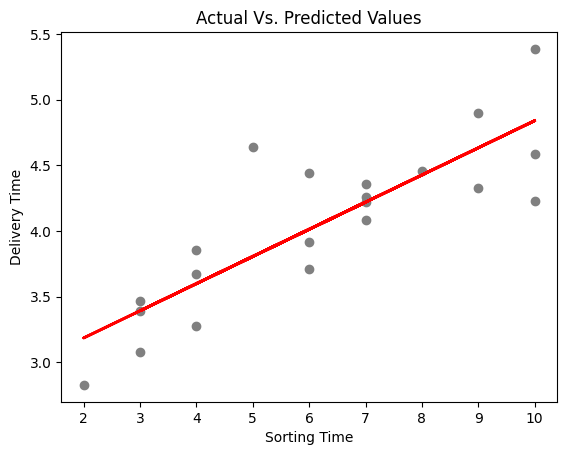

In [153]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.sorting_time, data1.sqrt_delivery_time,  color='gray')
plt.plot(data1.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [154]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.sqrt_delivery_time, predicted_time))
print('Mean Squared Error:', metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.sqrt_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data1.sqrt_delivery_time, predicted_time))

Mean Absolute Error: 0.2562892192762891
Mean Squared Error: 0.11045382417324966
Root Mean Squared Error: 0.33234594050965877
R^2 Score :           0.704049871541756


In [155]:
pred_df = pd.DataFrame({'Actual': (data1.sqrt_delivery_time)**2, 'Predicted': (predicted_time)**2})
pred_df

,Actual,Predicted
0,21.00,23.416397
1,13.50,12.954660
2,19.75,16.100332
3,24.00,21.459291
4,29.00,23.416397
5,15.35,16.100332
6,19.00,17.801258
7,9.50,11.509915
8,17.90,23.416397
9,18.75,21.459291


In [156]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           2.00e-06
Time:                        09:53:53   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion

We have found that while transforming the model,we got various values for MAE, RMSE, MSE and R 2 Values.

Summery of the following Models
-------------------------------------------------------------

**Simple linear Regression Model**

Mean Absolute Error: 2.0857409551882653

Mean Squared Error: 7.793311548584063

Root Mean Squared Error: 2.7916503270617654

R^2 Score : 0.6822714748417231


**Logrithm Transformation Model**

Mean Absolute Error: 2.0473757067928995

Mean Squared Error: 7.470226320948425

Root Mean Squared Error: 2.733171476682066

R^2 Score : 0.6954434611324223


**Square-root Transformation Model**


Mean Absolute Error: 0.2562892192762892

Mean Squared Error: 0.11045382417324966

Root Mean Squared Error: 0.33234594050965877

R^2 Score : 0.704049871541756¶

##Predict for new data Point

In [157]:

# Manual prediction for say sorting time 5
s= (6.582734) + (1.649020)*(5)
s

14.827834

In [158]:
newdata = pd.Series([5,19,21,11,31])
newdata
delrytime = pd.DataFrame( newdata, columns =['sorting_time'])
delrytime

,sorting_time
0,5
1,19
2,21
3,11
4,31


In [159]:
model.predict(delrytime)

0    14.827833
1    37.914112
2    41.212152
3    24.721953
4    57.702351
dtype: float64

In [160]:
delrytime['delivery_time_Predicted'] = model.predict(delrytime)
delrytime

,sorting_time,delivery_time_Predicted
0,5,14.827833
1,19,37.914112
2,21,41.212152
3,11,24.721953
4,31,57.702351


##2) Salary_hike -> Build a prediction model for Salary_hike


In [161]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [162]:
#Importing data set
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [163]:
import pandas as pd
dataset2 = pd.read_csv("Salary_Data.csv")
dataset2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA

In [164]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

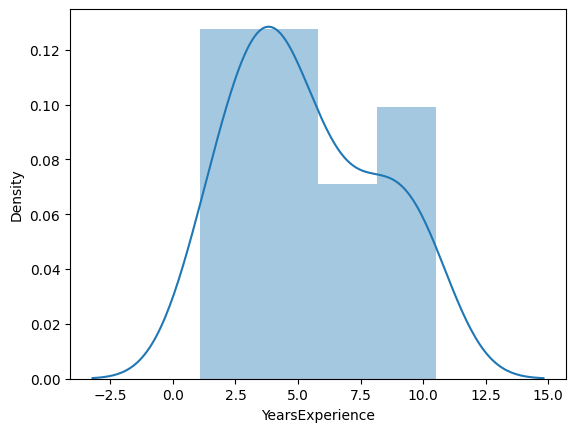

In [165]:
sns.distplot(dataset2['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

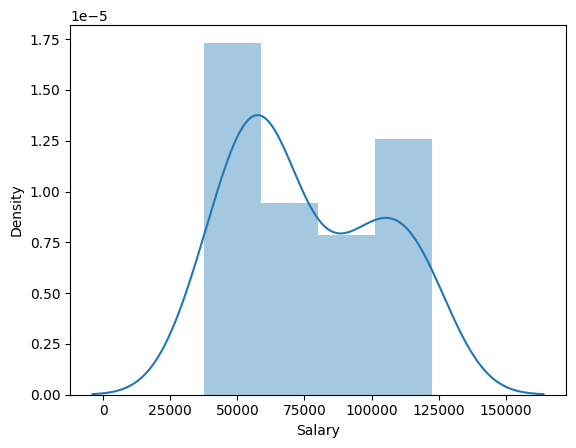

In [166]:
sns.distplot(dataset2['Salary'])

Correlation Analysis


In [167]:
dataset2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Visualization of Correlation beteen x and y
regplot = regression plot


<Axes: xlabel='YearsExperience', ylabel='Salary'>

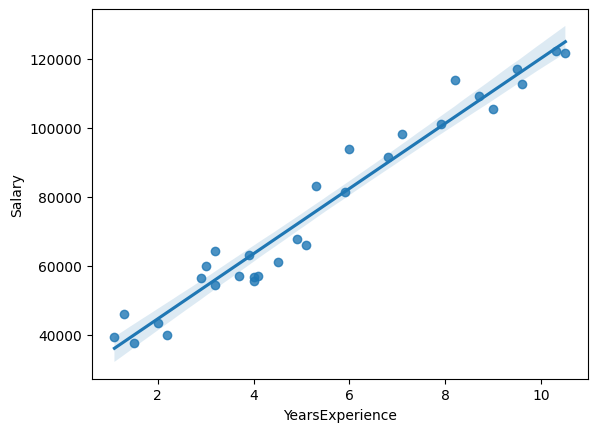

In [168]:
sns.regplot(x=dataset2['YearsExperience'],y=dataset2['Salary'])

###There is good correlation between the two variable.
###The score is more than 0.8 which is a good sign

Model Fitting

In [169]:

model1=smf.ols("Salary~YearsExperience",data=dataset2).fit()

Model Testing

In [170]:
model1.params

#coefficients Parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [171]:
#Pvalues and tvalues
model1.tvalues, model1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [172]:
# Rsquared values
model1.rsquared , model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [173]:
#To see the model predictions
model1.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Checking predictions of Model by equation
From the result Bo = 25792.200198668703 and B1 = 9449.962321455077, so our linear regression equation will become Y = Bo + B1X
Y = 25792.200198668703 + 9449.962321455077*X

In [174]:
dataset2['salary_Predicted'] = model1.fittedvalues
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


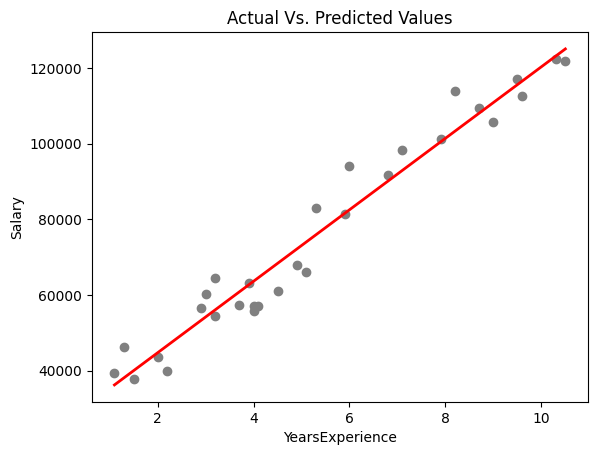

In [175]:
# Plotting Actual Vs. Predicted Values
plt.scatter(dataset2.YearsExperience, dataset2.Salary,  color='gray')
plt.plot(dataset2.YearsExperience, dataset2.salary_Predicted, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [176]:
#To generate the residual values
#Difference between Actual & Fitted values
dataset2['Error'] = model1.resid   #redid = residuals
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [177]:
dataset2['Y'] = 25792.200199 + (9449.962321 + dataset2['Salary'] + dataset2['Error'])
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error,Y
0,1.1,39343.0,36187.158752,3155.841248,77741.003768
1,1.3,46205.0,38077.151217,8127.848783,89575.011303
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214


In [178]:
dataset2['Error_Sq'] = (dataset2['Error'])**2
dataset2[0:5]

,YearsExperience,Salary,salary_Predicted,Error,Y,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,77741.003768,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,89575.011303,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214,4.477105e+07


In [179]:
Mean_Squared_Error2 = dataset2['Error_Sq'].mean()
Mean_Squared_Error2

31270951.72228097

In [180]:
model1.rsquared

0.9569566641435086

In [181]:
#95.69% of variation in the dependent variable is explained by the given independent varaible

In [182]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        09:54:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85.

(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

F-statitics is quite high as well and yes desire it to be higher

But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model



##Transformation

Building model with Logarithmic Transformation

Y = a + b * log(x)

In [183]:
# Preparing data for model building
data1 = pd.DataFrame.copy(dataset2)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,salary_Predicted,Error,Y,Error_Sq,log_YearsExperience
0,1.1,39343.0,36187.158752,3155.841248,77741.003768,9.959334e+06,0.095310
1,1.3,46205.0,38077.151217,8127.848783,89575.011303,6.606193e+07,0.262364
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839,5.000339e+06,0.405465
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678,1.362180e+06,0.693147
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214,4.477105e+07,0.788457


In [184]:
# Building model
log1_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [185]:
#parameters from Model

#Coefficients Parameters
print(log1_model.params)

# Getting tvalue and pvalue
tvalue, pvalue = (log1_model.tvalues, log1_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log1_model.rsquared, log1_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64
tvalue:  Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
pvalue:  Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
R2:  0.8538888828756969
R2_Adj:  0.8486706286926861


Checking predictions of Model by equation

From the result Bo = 14927.97177005727 and B1 = 40581.98795977906,

 so our linear regression equation will become Y = Bo + B1*log(X)

Y = 14927.97177005727 + 40581.98795977906*log(X)

In [187]:
predicted_salary = log1_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : dataset2.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875
5,56642.0,58136.050079
6,60150.0,59511.842441
7,54445.0,62130.943929
8,64445.0,62130.943929
9,57189.0,68022.718504


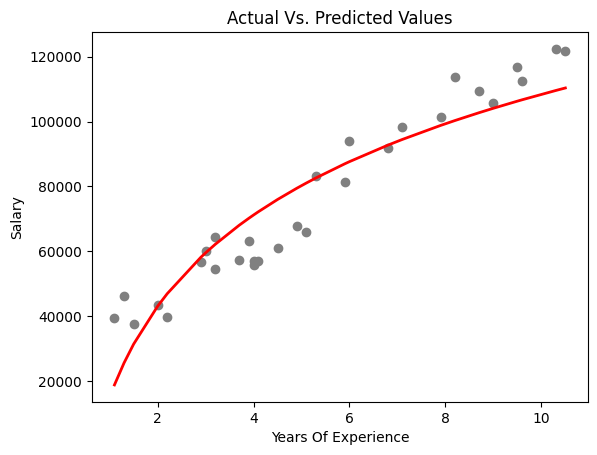

In [188]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [189]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))

Mean Absolute Error: 8443.584664486354
Mean Squared Error: 106149618.72183882
Root Mean Squared Error: 10302.893706228306
R^2 Score :           0.8538888828756969


In [190]:
log1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           3.25e-13
Time:                        09:55:58   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

exponential transformation

log(Y) =α + βX + ε

In [191]:
# preparing data to build exponential model
data1['log_Salary'] = np.log(data1.Salary)
data1.head()

,YearsExperience,Salary,salary_Predicted,Error,Y,Error_Sq,log_YearsExperience,log_Salary
0,1.1,39343.0,36187.158752,3155.841248,77741.003768,9.959334e+06,0.095310,10.580073
1,1.3,46205.0,38077.151217,8127.848783,89575.011303,6.606193e+07,0.262364,10.740843
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839,5.000339e+06,0.405465,10.538237
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678,1.362180e+06,0.693147,10.681091
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214,4.477105e+07,0.788457,10.593906


In [192]:
# Building model
exp_model = smf.ols('log_Salary ~ YearsExperience', data = data1).fit()

In [193]:
#parameters from Model

#Coefficients Parameters
print(exp_model.params)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64
tvalue:  Intercept          273.327166
YearsExperience     19.584833
dtype: float64
pvalue:  Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
R2:  0.9319671194084196
R2_Adj:  0.929537373673006


Checking predictions of Model by equation

From the result Bo = 10.507401896588272 and B1 = 0.12545288926085646

 so our linear regression equation will become log(Y)= Bo+B1X+e

log(Y) = 10.507401896588272 + 0.12545288926085646*X + e

In [194]:
predicted_salary = exp_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.log_Salary, 'exp_Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,exp_Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


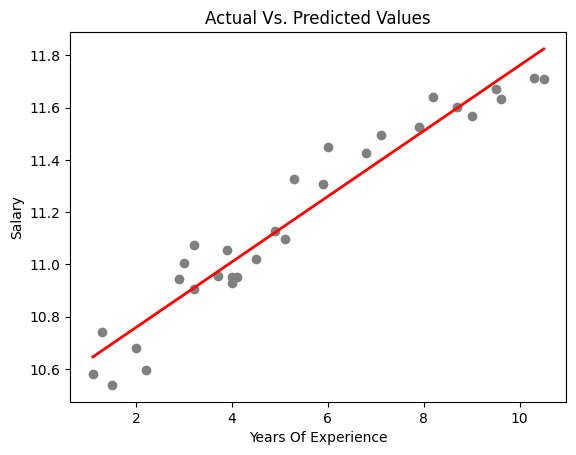

In [195]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.log_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [196]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.log_Salary, predicted_salary))
print('Mean Squared Error:', metrics.mean_squared_error(data1.log_Salary, predicted_salary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.log_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092214
Mean Squared Error: 0.00894431117203028
Root Mean Squared Error: 0.09457436847280705
R^2 Score :           0.9319671194084196


In [197]:
pred_df = pd.DataFrame({'Actual': np.exp(data1.log_Salary), 'Predicted': np.exp(predicted_salary)})
pred_df

,Actual,Predicted
0,39343.0,41998.957468
1,46205.0,43066.066794
2,37731.0,44160.289228
3,43525.0,47019.029189
4,39891.0,48213.688474
5,56642.0,52639.142472
6,60150.0,53303.675386
7,54445.0,54658.014935
8,64445.0,54658.014935
9,57189.0,58196.330788


In [198]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           7.03e-18
Time:                        09:56:29   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 square root transformation¶

√Y = a + b * X + e

In [199]:
# preparing data to build exponential model
data1['Sqrt_Salary'] = np.sqrt(data1.Salary)
data1.head()

,YearsExperience,Salary,salary_Predicted,Error,Y,Error_Sq,log_YearsExperience,log_Salary,Sqrt_Salary
0,1.1,39343.0,36187.158752,3155.841248,77741.003768,9.959334e+06,0.095310,10.580073,198.350700
1,1.3,46205.0,38077.151217,8127.848783,89575.011303,6.606193e+07,0.262364,10.740843,214.953483
2,1.5,37731.0,39967.143681,-2236.143681,70737.018839,5.000339e+06,0.405465,10.538237,194.244691
3,2.0,43525.0,44692.124842,-1167.124842,77600.037678,1.362180e+06,0.693147,10.681091,208.626460
4,2.2,39891.0,46582.117306,-6691.117306,68442.045214,4.477105e+07,0.788457,10.593906,199.727314


In [201]:
# Building model
sqrt1_model = smf.ols('Sqrt_Salary ~ YearsExperience', data = data1).fit()

In [202]:
#parameters from Model

#Coefficients Parameters
print(exp_model.params)

# Getting tvalue and pvalue
tvalue, pvalue = (sqrt1_model.tvalues, sqrt1_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (sqrt1_model.rsquared, sqrt1_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64
tvalue:  Intercept          40.646251
YearsExperience    23.025247
dtype: float64
pvalue:  Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
R2:  0.9498353533865289
R2_Adj:  0.9480437588646192


Checking predictions of Model by equation

From the result Bo = 180.70022140543102 and B1 = 17.056532050241962,

so our linear regression equation will become √Y = Bo + B1X + e

√Y = 180.70022140543102 + 17.056532050241962*X + e

In [205]:
predicted_salary = sqrt1_model.predict(data1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data1.Sqrt_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,198.350700,199.462407
1,214.953483,202.873713
2,194.244691,206.285019
3,208.626460,214.813286
4,199.727314,218.224592
5,237.995798,230.164164
6,245.254969,231.869818
7,233.334524,235.281124
8,253.860198,235.281124
9,239.142217,243.809390


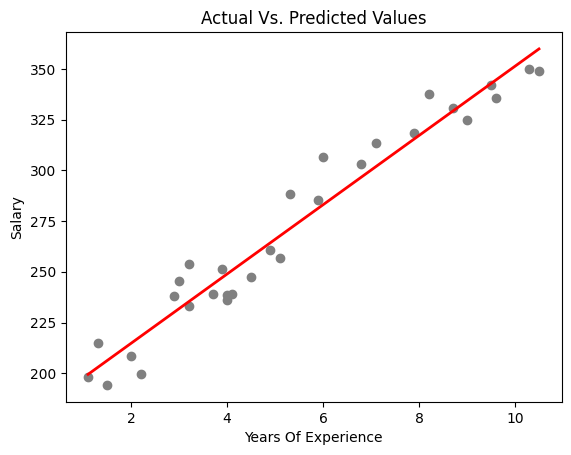

In [207]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.Sqrt_Salary,  color='gray')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [208]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Sqrt_Salary, predicted_salary))
print('Mean Squared Error:', metrics.mean_squared_error(data1.Sqrt_Salary, predicted_salary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Sqrt_Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Sqrt_Salary, predicted_salary))

Mean Absolute Error: 9.321657712741535
Mean Squared Error: 119.6184556032736
Root Mean Squared Error: 10.937022245715402
R^2 Score :           0.9498353533865289


In [210]:
pred_df = pd.DataFrame({'Actual': (data1.Sqrt_Salary)**2, 'Predicted': (predicted_salary)**2})
pred_df

,Actual,Predicted
0,39343.0,39785.251671
1,46205.0,41157.743455
2,37731.0,42553.509262
3,43525.0,46144.747630
4,39891.0,47621.972517
5,56642.0,52975.542551
6,60150.0,53763.612294
7,54445.0,55357.207295
8,64445.0,55357.207295
9,57189.0,59443.018648


In [211]:
sqrt1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sqrt_Salary   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           9.78e-20
Time:                        10:00:38   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         180.7002      4.446     40.646      0.000     171.594     189.807
YearsExperience    17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

prediction for new no:of Years

In [212]:
# Manual prediction for say 7 Years Experience
Salary = (25792.200199) + (9449.962321)*(7)
Salary

91941.936446

In [213]:
new_data=pd.Series([7,5,10,2,9])
new_data

0     7
1     5
2    10
3     2
4     9
dtype: int64

In [214]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,7
1,5
2,10
3,2
4,9


In [215]:
model1.predict(data_pred)

0     91941.936449
1     73042.011806
2    120291.823413
3     44692.124842
4    110841.861092
dtype: float64